In [1]:
# %pip install matplotlib seaborn scipy matplotlib

### **Bibliotecas**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro

### **Estatística e Machine Learning - QUESTÃO 2**

Um jogador frequente, leva um certo tempo entre o final de uma sessão de jogo e o início da outra.

A seguinte lista (dataset) contém esses tempos de espera (em dias).

**``dataset = [ 0, 1, 0, 2, 1, 2, 3, 2, 5, 15 ]``**


**Responder:**
- Qual é a distribuição paramétrica que melhor descreve a variável em questão, e por que?
|
- Descrever de maneira resumida o método utilizado para calcular os parâmetros da distribuição

<br>

-------

<br>
O dataset em questão é um conjunto discreto de dados



Média: 3.10
Mediana: 2.00

Variância: 19.66
Desvio Padrão: 4.21

Assimetria: 2.57 - Assimetria positiva, cauda à direita


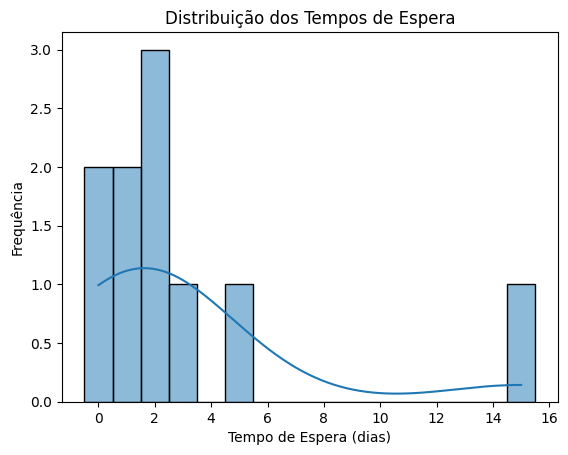

In [31]:
dataset = [ 0, 1, 0, 2, 1, 2, 3, 2, 5, 15 ]
dataset_df = pd.DataFrame(dataset, columns=['tempo de espera'])
dataset_df.sort_values(by=['tempo de espera'], inplace=True)


print(f'Média: {dataset_df['tempo de espera'].mean():.2f}')
print(f'Mediana: {dataset_df['tempo de espera'].median():.2f}')
print(f'\nVariância: {dataset_df['tempo de espera'].var():.2f}')
print(f'Desvio Padrão: {dataset_df['tempo de espera'].std(ddof=0):.2f}\n')
if dataset_df['tempo de espera'].skew() > 0:
    print(f'Assimetria: {dataset_df['tempo de espera'].skew():.2f} - Assimetria positiva, cauda à direita')
elif dataset_df['tempo de espera'].skew() < 0: 
    print(f'Assimetria: {dataset_df['tempo de espera'].skew():.2f} - Assimetria negativa, cauda à esquerda')
else:
    print(f'Assimetria: {dataset_df['tempo de espera'].skew():.2f} - A curva é simétrica')



# Histograma
sns.histplot(dataset, bins=10, kde=True, discrete=True)
plt.title('Distribuição dos Tempos de Espera')
plt.xlabel('Tempo de Espera (dias)')
plt.ylabel('Frequência')

plt.show()


Como dito anteriormente, distribuições exponenciais são usadas para modelar o tempo decorrido entre eventos.

